## Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the data 

In [7]:
df = pd.read_csv("raw_data/covidtotals.csv",
                parse_dates=['lastdate']) #converts the column into datetime64 format while reading the file


In [10]:
df.shape

(210, 12)

In [12]:
df.sample(2, random_state=2).T

,44,200
iso_code,COG,VIR
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,United States Virgin Islands
total_cases,611,69
total_deaths,20,6
total_cases_pm,110.727,660.774
total_deaths_pm,3.624,57.459
population,5518092.0,104423.0
pop_density,15.405,306.48
median_age,19.0,42.2


## Check null values

df.isnull().sum()

## Check Duplicates

df.duplicated(keep="first")

## Datatypes

In [14]:
df.dtypes

iso_code                   object
lastdate           datetime64[ns]
location                   object
total_cases                 int64
total_deaths                int64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
dtype: object

## Descriptive statistics on the dataframe (numeric colums)

In [21]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
lastdate,210,2020-05-31 23:12:00,2020-05-26 00:00:00,2020-06-01 00:00:00,2020-06-01 00:00:00,2020-06-01 00:00:00,2020-06-01 00:00:00,NaN
total_cases,210.0,29216.138095,0.0,175.75,1242.5,10117.0,1790191.0,136397.804441
total_deaths,210.0,1770.714286,0.0,4.0,25.5,241.25,104383.0,8705.565857
total_cases_pm,209.0,1361.842909,0.894,96.785,281.997,1803.318,19771.348,2629.894101
total_deaths_pm,209.0,55.92544,0.0,0.893,6.214,32.158,1237.551,145.081876
population,210.0,36942762.357143,809.0,1031042.5,6909866.0,26158676.5,1439323774.0,142509205.134503
pop_density,198.0,362.867434,0.137,37.416,87.25,214.122,19347.5,1581.438294
median_age,186.0,30.627957,15.1,22.25,30.25,39.0,48.2,9.133152
gdp_per_capita,182.0,19539.154588,661.24,4485.329,13183.0815,28556.52725,116935.6,19862.354091
hosp_beds,164.0,3.012671,0.1,1.3,2.3585,3.89575,13.8,2.464917


## Get the quantile distribution data

In [44]:
req_vars = ['total_cases', 'total_deaths','total_cases_pm', 'total_deaths_pm']

df[req_vars].quantile(np.arange(0,1.1,0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.8940,0.0000
0.1,22.9,0.0,18.4870,0.0000
0.2,105.2,2.0,56.7386,0.4008
0.3,302.0,6.7,118.2282,1.7348
0.4,762.0,12.0,214.9182,3.9734
0.5,1242.5,25.5,281.9970,6.2140
0.6,2514.6,54.6,546.0534,12.5644
0.7,6959.8,137.2,1074.0324,26.0638
0.8,16847.2,323.2,2208.7374,50.2896
0.9,46513.1,1616.9,3771.9956,139.5290


## View the distribution of total cases

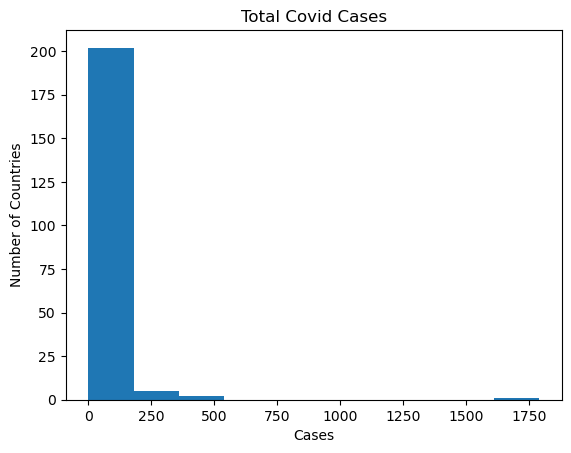

In [41]:
plt.hist(df['total_cases']/1000, bins =10)
plt.title("Total Covid Cases")
plt.xlabel("Cases")
plt.ylabel("Number of Countries")
plt.show()